<a href="https://colab.research.google.com/github/priyatampintu/image-clssification-shirtsandtshrts/blob/master/Assignment_4(all%20optimizers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
filename = '/content/drive/My Drive/Colab Notebooks/cloth.zip'
with ZipFile (filename, 'r') as zip1:
  zip1.extractall()
  print('done')

done


In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import itertools
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Activation,Dropout

from keras.optimizers import Adam, rmsprop, Nadam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import os
import cv2

from imutils import paths
import matplotlib.pyplot as plt
from keras.preprocessing import image

from google.colab.patches import cv2_imshow

import argparse
import imutils

In [3]:
test_dir='/content/cloth/test'
train_dir='/content/cloth/train'

train_dir_men_shrts = train_dir + '/men_shrts'
train_dir_men_tshrts = train_dir + '/men_tshrts'
test_dir_men_shrts = test_dir + '/men_shrts'
test_dir_men_tshrts = test_dir + '/men_tshrts'

In [4]:
print('number of men_shrts training images - ',len(os.listdir(train_dir_men_shrts)))
print('number of men_tshrts training images - ',len(os.listdir(train_dir_men_tshrts)))
print('number of men_shrts testing images - ',len(os.listdir(test_dir_men_shrts)))
print('number of men_tshrts testing images - ',len(os.listdir(test_dir_men_tshrts)))

number of men_shrts training images -  700
number of men_tshrts training images -  700
number of men_shrts testing images -  100
number of men_tshrts testing images -  100


**convert image into array and set target labels of shirt and tshirt**

In [5]:
#file_path = '/content/cloth'
train_data =[]
test_data = []

train_labels = []
test_labels = []
def image_array(file_path):

  for folder in os.listdir(file_path):
      #print(folder)
      if folder == 'train':
          sub_folder_path1 = os.path.join(file_path,folder)
          for sub_folder1 in os.listdir(sub_folder_path1):
              #print(sub_folder1)
              if sub_folder1 == 'men_shrts':
                  file_path1 = os.path.join(sub_folder_path1,sub_folder1)
                  for files in os.listdir(file_path1):
                      #print(files)
                      train_image_path = os.path.join(file_path1 ,files)
                      image = cv2.imread(train_image_path)
                      image = cv2.resize(image, (128, 128))
                      image = img_to_array(image)
                      train_data.append(image)
                      
                      label = 0
                      train_labels.append(label)
                      

              if sub_folder1 == 'men_tshrts':
                  file_path1 = os.path.join(sub_folder_path1,sub_folder1)
                  for files in os.listdir(file_path1):
                      #print(files)
                      train_image_path = os.path.join(file_path1 ,files)
                      image = cv2.imread(train_image_path)
                      image = cv2.resize(image, (128, 128))
                      image = img_to_array(image)
                      train_data.append(image)

                      label = 1
                      train_labels.append(label)
                      
      elif folder == 'test':
          sub_folder_path = os.path.join(file_path,folder)
          for sub_folder in os.listdir(sub_folder_path):
              #print(sub_folder)
              if sub_folder == 'men_shrts':
                  file_path2 = os.path.join(sub_folder_path,sub_folder)
                  for files in os.listdir(file_path2):
                      #print(files)
                      test_image_path = os.path.join(file_path2 ,files)
                      image = cv2.imread(test_image_path)
                      image = cv2.resize(image, (128, 128))
                      image = img_to_array(image)
                      test_data.append(image)
                      
                      label = 0 
                      test_labels.append(label)
                      
                  
              if sub_folder == 'men_tshrts':
                  file_path2 = os.path.join(sub_folder_path,sub_folder)
                  for files in os.listdir(file_path2):
                      #print(files)
                      test_image_path = os.path.join(file_path2 ,files)
                      image = cv2.imread(test_image_path)
                      image = cv2.resize(image, (128, 128))
                      image = img_to_array(image)
                      test_data.append(image)
                      
                      label = 1 
                      test_labels.append(label)
  return

In [6]:
image_array(input('enter image path '))

enter image path /content/cloth


**standardize the data set and convert target label into vectors**

In [7]:
# scale the raw pixel intensities to the range [0, 1]
train_X = np.array(train_data, dtype="float") / 255.0
train_y = np.array(train_labels)

test_X = np.array(test_data, dtype="float") / 255.0
test_y = np.array(test_labels)

# convert the labels from integers to vectors
trainY = to_categorical(train_y, num_classes=2)
testY = to_categorical(test_y, num_classes=2)

**create model and plot accuracy and loss**

**each optimiser for 20 epochs and define all the callbacks (checkpoint, earlystopping, reducedLRonplateau) ** 

In [17]:
batch_size=32
epochs= 20
verbose=1

#intialize the CNN model
def create_model():
  model = Sequential()

  model.add(Conv2D(32,(3,3), padding = 'same',
                  input_shape=(128, 128, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(32,(3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(64,(3,3),padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))


  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(2))
  model.add(Activation('softmax'))
  return model


def callbacks(opt_model):
  checkpoint = ModelCheckpoint(r"men_cloth_{}.h5".format(opt_model), 
                               monitor="val_loss",
                               mode="min",
                               save_best_only= True,
                               verbose=1)
  
  earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience= 3,
                          verbose = 1,
                          restore_best_weights = True)
  
  reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                factor=0.2,
                                patience = 3,
                                verbose =1,
                                min_delta = 0.0001)
  
  #we put our all callbacks into callbacks list
  callbacks = [earlystop, checkpoint, reduce_lr]

  return callbacks


def plot_metrics(h, title=""):
  """ Plot training metrics - loss and accuracy, for each epoch, 
        given a training history object
    """

  fig, axes = plt.subplots(1,2, figsize=(10,5))
    
  axes[0].plot(h.history['loss'], color="lightblue", label="Training", lw=2.0)
  axes[0].plot(h.history['val_loss'], color="steelblue", label="Validation", lw=2.0)

  axes[0].set_title("{} (Loss)".format(title))
  axes[0].set_xlabel("Epoch")
  axes[0].set_xticks(np.arange(len(h.history["loss"]), 2))
  axes[0].set_ylabel("Loss")

  axes[1].plot(h.history['accuracy'], color="lightblue", label="Training", lw=2.0)
  axes[1].plot(h.history['val_accuracy'], color="steelblue", label="Validation", lw=2.0)

  axes[1].set_title("{} (Accuracy)".format(title))
  axes[1].set_xlabel("Epoch")
  axes[1].set_xticks(np.arange(len(h.history["accuracy"]), 2))
  axes[1].set_ylabel("Accuracy")


  for axis in axes:
    axis.ticklabel_format(useOffset=False)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.legend(loc='best', shadow=False)
  fig.tight_layout()
      
  

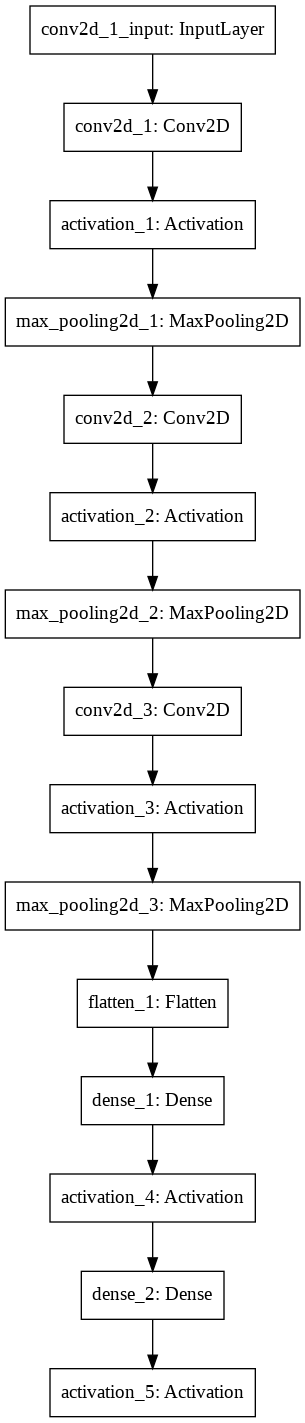

In [9]:
model = create_model()
keras.utils.plot_model(model,to_file= 'model.png')

**Model 1(SGD with momentum)**

In [62]:
model0 = create_model()
opt0 = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model0.compile(loss = 'binary_crossentropy',optimizer = opt0, metrics = ['accuracy'])



model0_batch_hist = callbacks('SGD')

model0_metrics = model0.fit(train_X,trainY, batch_size = batch_size, epochs = epochs, 
          validation_data = (test_X, testY), verbose = verbose, callbacks= model0_batch_hist)


Train on 1400 samples, validate on 200 samples
Epoch 1/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.6709 - accuracy: 0.5886 - val_loss: 0.5680 - val_accuracy: 0.8100

Epoch 00001: val_loss improved from inf to 0.56803, saving model to men_cloth_SGD.h5
Epoch 2/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.5663 - accuracy: 0.7307 - val_loss: 0.3917 - val_accuracy: 0.8300

Epoch 00002: val_loss improved from 0.56803 to 0.39170, saving model to men_cloth_SGD.h5
Epoch 3/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.3786 - accuracy: 0.8471 - val_loss: 0.2185 - val_accuracy: 0.9200

Epoch 00003: val_loss improved from 0.39170 to 0.21855, saving model to men_cloth_SGD.h5
Epoch 4/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2430 - accuracy: 0.8950 - val_loss: 0.2137 - val_accuracy: 0.8850

Epoch 00004: val_loss improved from 0.21855 to 0.21370, saving model to men_cloth_SGD.h5
Epoch 5/20
1400/1400 

**Model 2(nesterov optimizer)**

In [69]:
model1 = create_model()
opt1 = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,nesterov=True)
model1.compile(loss = 'binary_crossentropy',optimizer = opt1, metrics = ['accuracy'])

model1_batch_hist = callbacks('nesterov')

model1_metrics = model1.fit(train_X,trainY, batch_size = batch_size, epochs = epochs, 
          validation_data = (test_X, testY), verbose = verbose, callbacks=model1_batch_hist)


Train on 1400 samples, validate on 200 samples
Epoch 1/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.5891 - accuracy: 0.6600 - val_loss: 0.3802 - val_accuracy: 0.8050

Epoch 00001: val_loss improved from inf to 0.38016, saving model to men_cloth_nesterov.h5
Epoch 2/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.3450 - accuracy: 0.8571 - val_loss: 0.2649 - val_accuracy: 0.8750

Epoch 00002: val_loss improved from 0.38016 to 0.26493, saving model to men_cloth_nesterov.h5
Epoch 3/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.1956 - accuracy: 0.9221 - val_loss: 0.1943 - val_accuracy: 0.9100

Epoch 00003: val_loss improved from 0.26493 to 0.19428, saving model to men_cloth_nesterov.h5
Epoch 4/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.1334 - accuracy: 0.9586 - val_loss: 0.2262 - val_accuracy: 0.8800

Epoch 00004: val_loss did not improve from 0.19428
Epoch 5/20
1400/1400 [======================

**Model 3(Adam optimizer)**

In [66]:
model2 = create_model()
opt3 = Adam(lr=0.0001,decay = 1e-6)
model2.compile(loss = 'binary_crossentropy',optimizer = opt3, metrics = ['accuracy'])

model2_batch_hist = callbacks('Adam')

model2_metrics = model2.fit(train_X,trainY, batch_size = batch_size, epochs = epochs, 
          validation_data = (test_X, testY), verbose = verbose, callbacks=model2_batch_hist)


Train on 1400 samples, validate on 200 samples
Epoch 1/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7221 - val_loss: 0.3341 - val_accuracy: 0.8750

Epoch 00001: val_loss improved from inf to 0.33408, saving model to men_cloth_Adam.h5
Epoch 2/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.3482 - accuracy: 0.8614 - val_loss: 0.3476 - val_accuracy: 0.8100

Epoch 00002: val_loss did not improve from 0.33408
Epoch 3/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2682 - accuracy: 0.8893 - val_loss: 0.1958 - val_accuracy: 0.9200

Epoch 00003: val_loss improved from 0.33408 to 0.19576, saving model to men_cloth_Adam.h5
Epoch 4/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2087 - accuracy: 0.9264 - val_loss: 0.1780 - val_accuracy: 0.9400

Epoch 00004: val_loss improved from 0.19576 to 0.17804, saving model to men_cloth_Adam.h5
Epoch 5/20
1400/1400 [==============================] - 

**Model 4(RMSprop optimizer)**

In [65]:
model3 = create_model()
opt3 = keras.optimizers.rmsprop(lr=0.0001,decay = 1e-6)
model3.compile(loss = 'binary_crossentropy', optimizer = opt3, metrics = ['accuracy'])

model3_batch_hist = callbacks('rmsprop')

model3_metrics = model3.fit(train_X,trainY, batch_size = batch_size, epochs = epochs, 
          validation_data = (test_X, testY), verbose = verbose, callbacks=model3_batch_hist)


Train on 1400 samples, validate on 200 samples
Epoch 1/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.5729 - accuracy: 0.7100 - val_loss: 0.3568 - val_accuracy: 0.8600

Epoch 00001: val_loss improved from inf to 0.35677, saving model to men_cloth_rmsprop.h5
Epoch 2/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.3895 - accuracy: 0.8279 - val_loss: 0.2419 - val_accuracy: 0.9350

Epoch 00002: val_loss improved from 0.35677 to 0.24191, saving model to men_cloth_rmsprop.h5
Epoch 3/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.3115 - accuracy: 0.8686 - val_loss: 0.2213 - val_accuracy: 0.9300

Epoch 00003: val_loss improved from 0.24191 to 0.22125, saving model to men_cloth_rmsprop.h5
Epoch 4/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2438 - accuracy: 0.8979 - val_loss: 0.1762 - val_accuracy: 0.9400

Epoch 00004: val_loss improved from 0.22125 to 0.17622, saving model to men_cloth_rmsprop.h5
Epoch

**Model 5(Nadam optimizer)**

In [71]:
model4 = create_model()
opt4 = Nadam(lr=0.0001)
model4.compile(loss = 'binary_crossentropy',optimizer = opt4, metrics = ['accuracy'])

model4_batch_hist = callbacks('Nadam')

model4_metrics = model4.fit(train_X,trainY, batch_size = batch_size, epochs = epochs, 
          validation_data = (test_X, testY), verbose = verbose, callbacks=model4_batch_hist)


Train on 1400 samples, validate on 200 samples
Epoch 1/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.5857 - accuracy: 0.6743 - val_loss: 0.3443 - val_accuracy: 0.8550

Epoch 00001: val_loss improved from inf to 0.34432, saving model to men_cloth_Nadam.h5
Epoch 2/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.3825 - accuracy: 0.8257 - val_loss: 0.2274 - val_accuracy: 0.9350

Epoch 00002: val_loss improved from 0.34432 to 0.22738, saving model to men_cloth_Nadam.h5
Epoch 3/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2739 - accuracy: 0.8879 - val_loss: 0.3998 - val_accuracy: 0.7850

Epoch 00003: val_loss did not improve from 0.22738
Epoch 4/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2305 - accuracy: 0.9221 - val_loss: 0.2163 - val_accuracy: 0.8900

Epoch 00004: val_loss improved from 0.22738 to 0.21634, saving model to men_cloth_Nadam.h5
Epoch 5/20
1400/1400 [==============================]

**plot accuracy and loss of train and validation of each model**

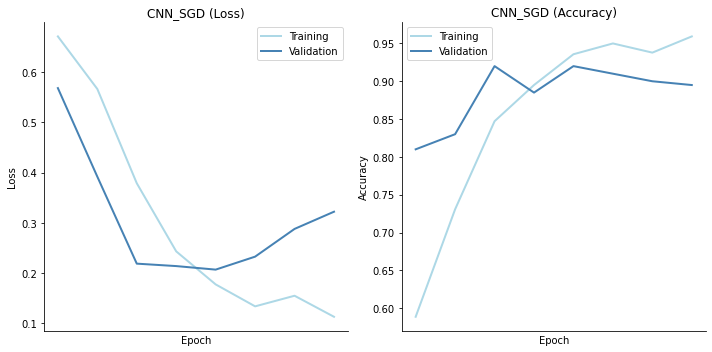

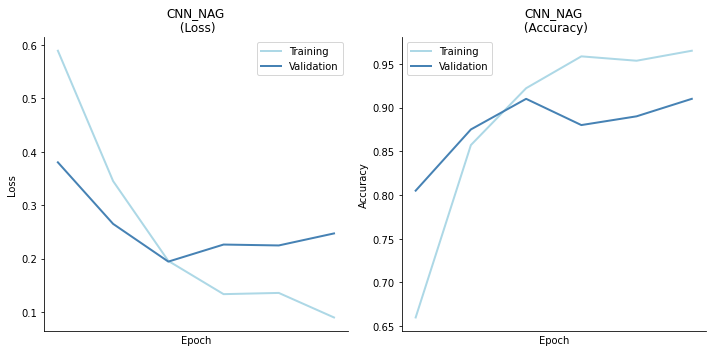

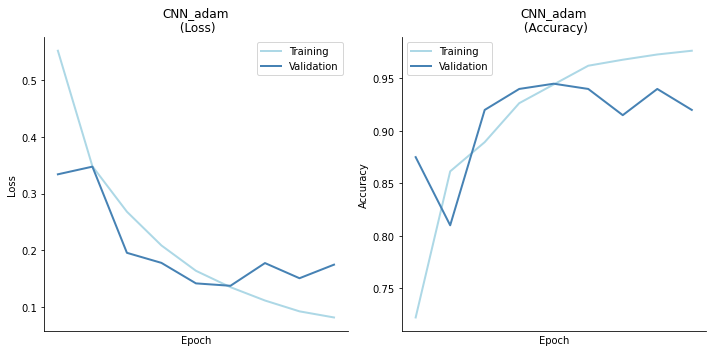

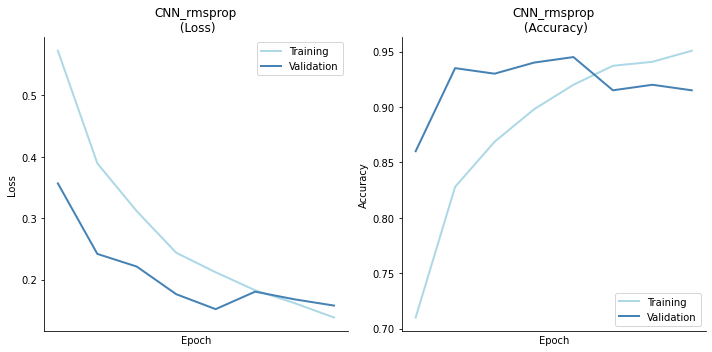

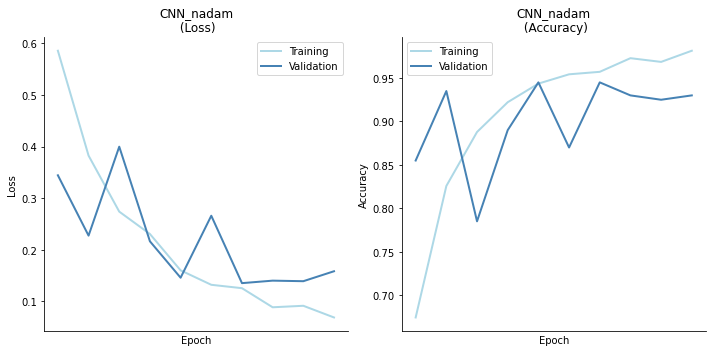

In [72]:
plot_metrics(model0_metrics,"CNN_SGD")
plot_metrics(model1_metrics,"CNN_NAG\n")
plot_metrics(model2_metrics,"CNN_adam\n")
plot_metrics(model3_metrics,"CNN_rmsprop\n")
plot_metrics(model4_metrics,"CNN_nadam\n")

**here,we can see that Nadam optimizer model gives best accuracy and loss out of all different optimizer model. **

**Adjust the learning rates and observe the changes of our best model**

Train on 1400 samples, validate on 200 samples
Epoch 1/20
1400/1400 [==============================] - 8s 6ms/step - loss: 7.5187 - accuracy: 0.5014 - val_loss: 7.6685 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 7.66855, saving model to men_cloth_Nadam.h5
Epoch 2/20
1400/1400 [==============================] - 2s 1ms/step - loss: 7.6895 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 7.66855
Epoch 3/20
1400/1400 [==============================] - 2s 1ms/step - loss: 7.6895 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 7.66855
Epoch 4/20
1400/1400 [==============================] - 2s 1ms/step - loss: 7.6895 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000
Restoring model weights from the end of the best epoch

Epoch 00004: val_loss did not improve from 7.66855

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.2.
Epoch 00004: ea

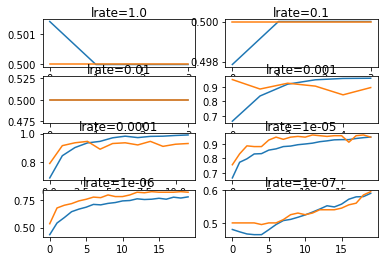

In [15]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):

	# define model
  model4 = create_model()
  
	# compile model
  opt4 = Nadam(lr=lrate)
  model4.compile(loss = 'binary_crossentropy',optimizer = opt4, metrics = ['accuracy'])

  model4_batch_hist = callbacks('Nadam')

	# fit model
  model4_metrics = model4.fit(train_X,trainY, batch_size = batch_size, epochs = epochs, 
            validation_data = (test_X, testY), verbose = verbose, callbacks=model4_batch_hist)
  
	# plot learning curves
  pyplot.plot(model4_metrics.history['accuracy'], label='train')
  pyplot.plot(model4_metrics.history['val_accuracy'], label='test')
  pyplot.title('lrate='+str(lrate), pad=-50)
 

# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(train_X,trainY, test_X, testY, learning_rates[i])
# show learning curves
pyplot.show()

** here, we can see that the best training and validation accuracy get from learning rate = 1e-5 almost equal to traning and validation accuracy (95%)**

**finalize and observe all optimizer model's accuracy**

Model,Training Accuracy,Validation Accuracy,Test Accuracy
CNN_SGD,95.93,89.50,92.00
CNN_NAG,96.50,91.00,91.00
CNN_adam,97.64,92.00,94.00
CNN_rmsprop,95.07,91.50,94.50
CNN_nadam,98.14,93.00,94.50


Text(0.5, 1.0, 'Accuracy')

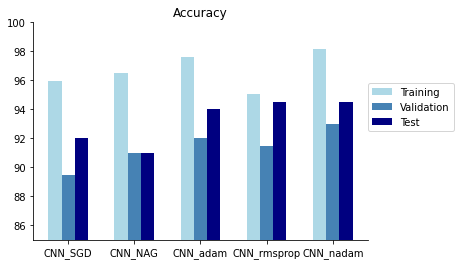

In [73]:
models = [model0, model1, model2, model3, model4]
metrics = [model0_metrics, model1_metrics, model2_metrics, model3_metrics, model4_metrics]
names = ["CNN_SGD", "CNN_NAG", "CNN_adam", "CNN_rmsprop", "CNN_nadam"]

data = []

for a, b, c in itertools.zip_longest(names, metrics, models):
  data.append([a, "{:0.2f}".format(b.history["accuracy"][-1]*100), "{:0.2f}".format(b.history["val_accuracy"][-1]*100),
                 "{:0.2f}".format(c.evaluate(test_X, testY, verbose=0)[1]*100)])
  
results = pd.DataFrame(data, columns=("Model","Training Accuracy","Validation Accuracy", "Test Accuracy"))
from IPython.display import display, HTML
display(HTML(results.to_html(index=False)))
plt.bar(np.arange(len(results["Model"].values)),results["Training Accuracy"].values.astype("float64"), 0.2, color="lightblue")
plt.bar(np.arange(len(results["Model"].values))+0.2,results["Validation Accuracy"].values.astype("float64"), 0.2, color="steelblue")
plt.bar(np.arange(len(results["Model"].values))+0.4,results["Test Accuracy"].values.astype("float64"), 0.2, color="navy")
plt.ylim(85, 100)
plt.xticks(np.arange(len(results["Model"].values))+0.2, ["CNN_SGD","CNN_NAG", "CNN_adam","CNN_rmsprop","CNN_nadam"])
plt.legend(["Training","Validation", "Test"],loc=(1,0.5))
g = plt.gca()
g.spines["top"].set_visible(False)
g.spines["right"].set_visible(False)
plt.title("Accuracy")


**load our best model**

In [2]:
from keras.models import load_model
classifier = load_model('/content/drive/My Drive/Colab Notebooks/men_cloth_Nadam.h5')

**predict test and unseen image data with their accuracy**

In [75]:
def predict_image(image_path):
  
  # load the image
  image = cv2.imread(image_path)
  orig = image.copy()
  # pre-process the image for classification
  image = cv2.resize(image, (128, 128))
  image = image.astype("float") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)

  # classify the input image
  shrt, tshrt = classifier.predict(image)[0]

  # build the label
  label = "tshirt" if tshrt > shrt else "shirt"
  proba = tshrt if tshrt > shrt else shrt
  label = "{}: {:.2f}%".format(label, proba * 100)

  # draw the label on the image
  output = imutils.resize(orig, width=400)
  cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
    0.7, (0, 255, 0), 2)
  
  # show the output image
  cv2_imshow( output)
  cv2.waitKey(0)
  
  return

enter image path to predict category of cloth  /content/cloth/test/men_shrts/img_312.jpeg


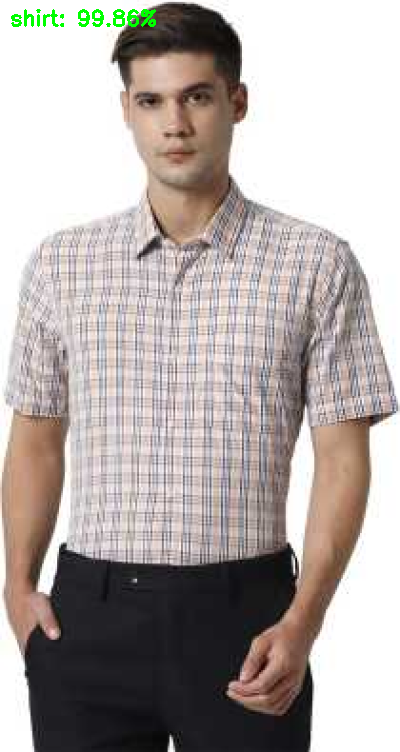

In [79]:
predict_image(input('enter image path to predict category of cloth  '))

**predict random 10 test data image**

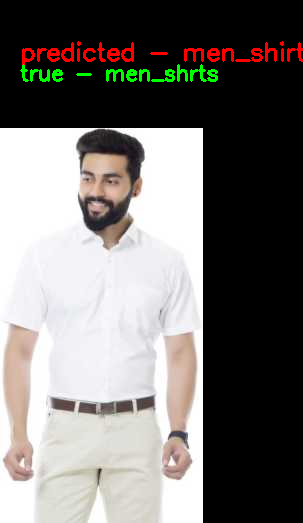

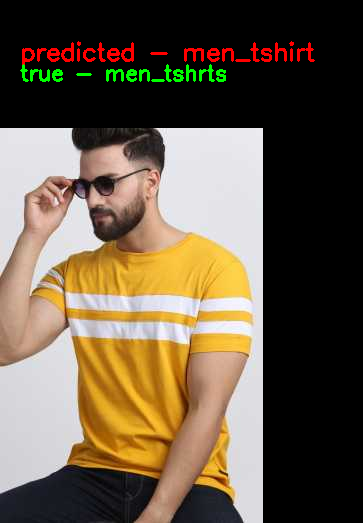

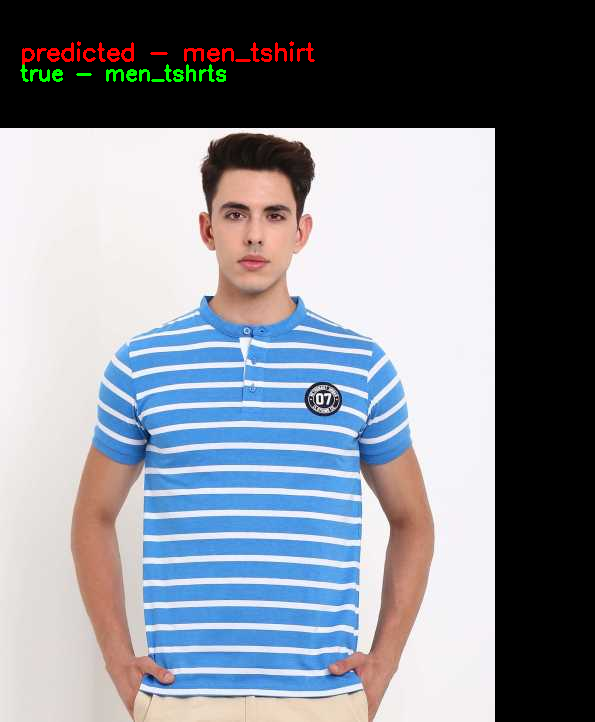

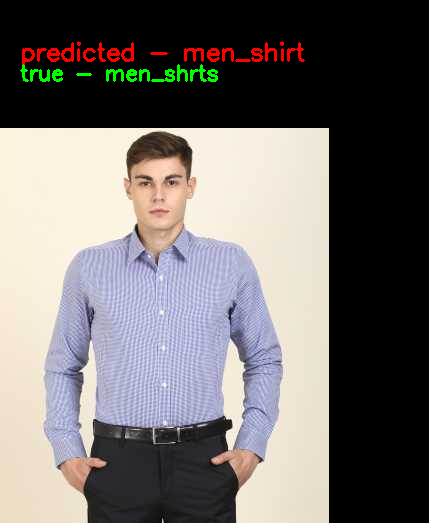

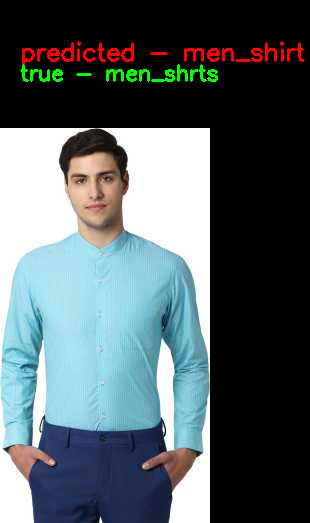

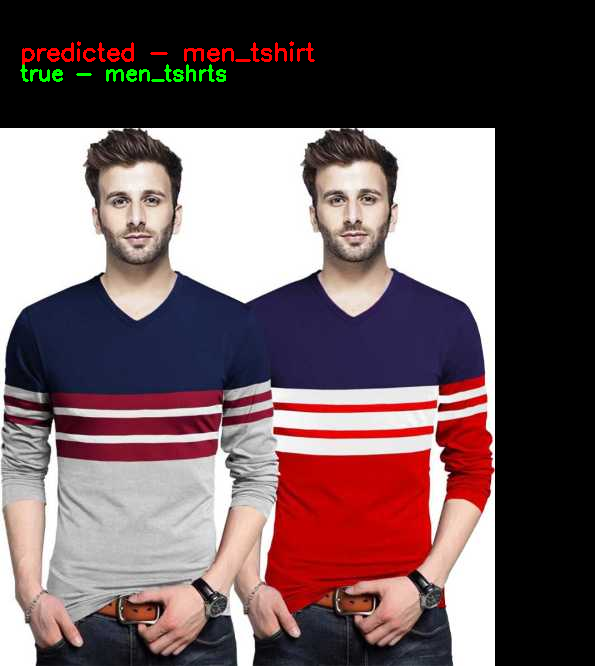

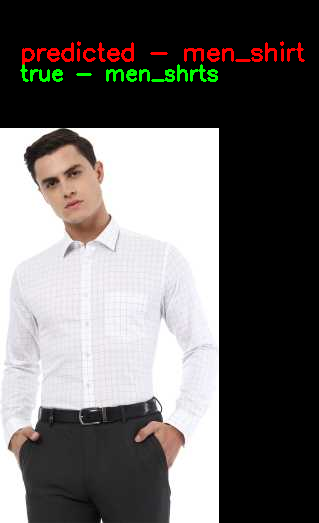

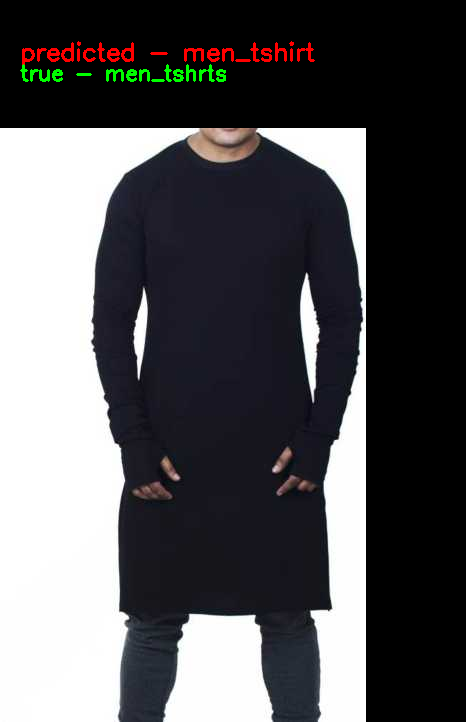

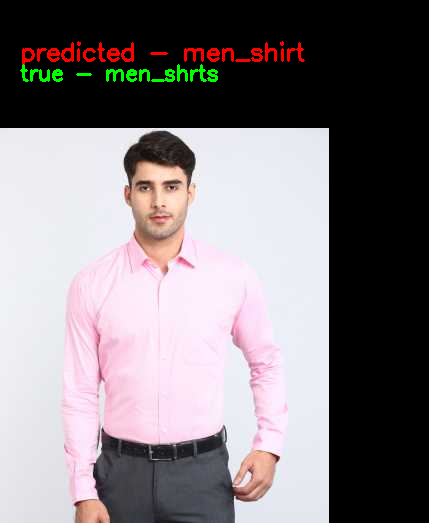

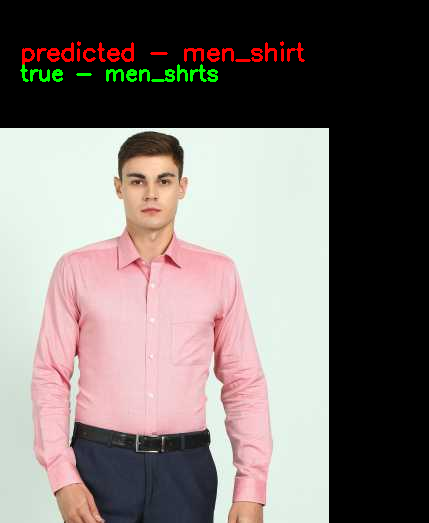

In [9]:
from keras.preprocessing import image
from os import listdir
from os.path import isfile,join
import re
import os
def draw_test(name,pred, im, true_label):
  Black = [0,0,0]
  expanded_image = cv2.copyMakeBorder(im, 128, 0,0, 100, cv2.BORDER_CONSTANT,value =Black)
  cv2.putText(expanded_image, "predicted - "+pred, (20,60), cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255), 2)
  cv2.putText(expanded_image, "true - "+true_label, (20,80), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0), 2)
  cv2_imshow(expanded_image)

def getRandomImage(path,img_width,img_height):
  """function loads a random image from a random folder in our test path"""
  folders = list(filter(lambda x:os.path.isdir(os.path.join(path, x)),os.listdir(path)))
  random_directory = np.random.randint(0,len(folders))
  path_class = folders[random_directory]
  file_path = path + "/" + path_class
  file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
  random_file_index = np.random.randint(0,len(file_names))
  image_name = file_names[random_file_index]
  final_path = file_path + "/" + image_name
  return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

#dimensions of images
img_width,img_height = 128, 128
class_labels = {0 : 'men_shirt' , 1 : 'men_tshirt'}
files = []
predictions = []
true_labels = []
#predictions images
for i in range(0,10):
  path = '/content/cloth/test'
  img, final_path, true_label = getRandomImage(path, img_width,img_height)
  files.append(final_path)
  true_labels.append(true_label)
  x = image.img_to_array(img)
  x = x * 1./255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = classifier.predict_classes(images, batch_size= 10)
  predictions.append(classes)

for i in range(0,len(files)):
  image = cv2.imread(files[i])
  draw_test("prediction", class_labels[predictions[i][0]], image, true_labels[i])
  cv2.waitKey()

cv2.destroyAllWindows()     

**here,we can see that my model predicted right of all random test data images. **